# **Análise Temporal dos Acidentes de Trânsito no Brasil em 2025**

In [90]:
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
import locale



- ***Desempacotando os dados***

In [91]:
FILE_ZIP = './../data.zip'
FILE_DATA = 'acidentes2025_todas_causas_tipos.csv'

with zipfile.ZipFile(FILE_ZIP, 'r') as zf:
    with zf.open(FILE_DATA) as file:
        df = pd.read_csv(file, sep=';', encoding='ISO-8859-1')

- ***Explorando os dados***

In [92]:
display(df.shape)
display(df.head(10))
display(df.isnull().sum())
display(df.dtypes)

(329676, 37)

,id,pesid,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_principal,...,sexo,ilesos,feridos_leves,feridos_graves,mortos,latitude,longitude,regional,delegacia,uop
0,652468,1467636.0,2025-01-01,quarta-feira,00:30:00,PE,101.0,"89,5",JABOATAO DOS GUARARAPES,Sim,...,Não Informado,0.0,0.0,0.0,0.0,"-8,20760697","-34,98372005",SPRF-PE,DEL01-PE,UOP01-DEL01-PE
1,652468,1467635.0,2025-01-01,quarta-feira,00:30:00,PE,101.0,"89,5",JABOATAO DOS GUARARAPES,Sim,...,Feminino,0.0,1.0,0.0,0.0,"-8,20760697","-34,98372005",SPRF-PE,DEL01-PE,UOP01-DEL01-PE
2,652468,1467634.0,2025-01-01,quarta-feira,00:30:00,PE,101.0,"89,5",JABOATAO DOS GUARARAPES,Sim,...,Masculino,0.0,1.0,0.0,0.0,"-8,20760697","-34,98372005",SPRF-PE,DEL01-PE,UOP01-DEL01-PE
3,652468,1467637.0,2025-01-01,quarta-feira,00:30:00,PE,101.0,"89,5",JABOATAO DOS GUARARAPES,Sim,...,Não Informado,0.0,0.0,0.0,0.0,"-8,20760697","-34,98372005",SPRF-PE,DEL01-PE,UOP01-DEL01-PE
4,652469,1467628.0,2025-01-01,quarta-feira,00:50:00,SC,101.0,120,ITAJAI,Sim,...,Feminino,0.0,1.0,0.0,0.0,"-26,912758","-48,711998",SPRF-SC,DEL04-SC,UOP04-DEL04-SC
5,652469,1467627.0,2025-01-01,quarta-feira,00:50:00,SC,101.0,120,ITAJAI,Sim,...,Masculino,1.0,0.0,0.0,0.0,"-26,912758","-48,711998",SPRF-SC,DEL04-SC,UOP04-DEL04-SC
6,652470,1467671.0,2025-01-01,quarta-feira,01:15:00,GO,153.0,414,ANAPOLIS,Sim,...,Feminino,0.0,0.0,1.0,0.0,"-16,133518","-49,047565",SPRF-GO,DEL02-GO,UOP02-DEL02-GO
7,652470,1467672.0,2025-01-01,quarta-feira,01:15:00,GO,153.0,414,ANAPOLIS,Sim,...,Feminino,1.0,0.0,0.0,0.0,"-16,133518","-49,047565",SPRF-GO,DEL02-GO,UOP02-DEL02-GO
8,652470,1467670.0,2025-01-01,quarta-feira,01:15:00,GO,153.0,414,ANAPOLIS,Sim,...,Masculino,1.0,0.0,0.0,0.0,"-16,133518","-49,047565",SPRF-GO,DEL02-GO,UOP02-DEL02-GO
9,652470,1467669.0,2025-01-01,quarta-feira,01:15:00,GO,153.0,414,ANAPOLIS,Sim,...,Feminino,1.0,0.0,0.0,0.0,"-16,133518","-49,047565",SPRF-GO,DEL02-GO,UOP02-DEL02-GO


id                            0
pesid                     32739
data_inversa                  0
dia_semana                    0
horario                       0
uf                            0
br                          860
km                          860
municipio                     0
causa_principal               0
causa_acidente                0
ordem_tipo_acidente           0
tipo_acidente                 0
classificacao_acidente        7
fase_dia                      0
sentido_via                   0
condicao_metereologica        0
tipo_pista                    0
tracado_via                   0
uso_solo                      0
id_veiculo                10558
tipo_veiculo              10558
marca                         0
ano_fabricacao_veiculo    10558
tipo_envolvido            32739
estado_fisico             32739
idade                     60530
sexo                      32739
ilesos                    32739
feridos_leves             32739
feridos_graves            32739
mortos  

id                          int64
pesid                     float64
data_inversa               object
dia_semana                 object
horario                    object
uf                         object
br                        float64
km                         object
municipio                  object
causa_principal            object
causa_acidente             object
ordem_tipo_acidente         int64
tipo_acidente              object
classificacao_acidente     object
fase_dia                   object
sentido_via                object
condicao_metereologica     object
tipo_pista                 object
tracado_via                object
uso_solo                   object
id_veiculo                float64
tipo_veiculo               object
marca                      object
ano_fabricacao_veiculo    float64
tipo_envolvido             object
estado_fisico              object
idade                     float64
sexo                       object
ilesos                    float64
feridos_leves 

- Selecionando as colunas
- Convertendo os tipos
- Ordenando o dia da semana
- Ordenando os meses

In [93]:


time = df[['data_inversa', 'dia_semana', 'horario']].copy()
time.columns = ['data', 'dia', 'hora']

# Configura locale para português (Windows)
locale.setlocale(locale.LC_TIME, "Portuguese_Brazil.1252")

# Ajustes de data e hora
time['data'] = pd.to_datetime(time['data'])
time['hora'] = pd.to_datetime(time['hora']).dt.hour

# Nome do mês em português
time['mes'] = pd.to_datetime(time['data']).dt.strftime("%B").str.lower()

# Ordem dos dias da semana
ord_day = [
    'domingo',
    'segunda-feira',
    'terça-feira',
    'quarta-feira',
    'quinta-feira',
    'sexta-feira',
    'sabado'
]
time['dia'] = pd.Categorical(time['dia'], categories=ord_day, ordered=True)

# Ordem dos meses
ord_month = [
    'janeiro', 'fevereiro', 'março', 'abril', 'maio', 'junho',
    'julho', 'agosto', 'setembro', 'outubro', 'novembro', 'dezembro'
]
time['mes'] = pd.Categorical(time['mes'], categories=ord_month, ordered=True)

# Índice pela data
time.set_index('data', inplace=True)

time.head()


C:\Users\galax\AppData\Local\Temp\ipykernel_15080\1268870987.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  time['hora'] = pd.to_datetime(time['hora']).dt.hour


,dia,hora,mes
data,,,
2025-01-01,quarta-feira,0,janeiro
2025-01-01,quarta-feira,0,janeiro
2025-01-01,quarta-feira,0,janeiro
2025-01-01,quarta-feira,0,janeiro
2025-01-01,quarta-feira,0,janeiro


- Contador de acidentes

In [94]:
time['acidente'] = 1


- Agregando a soma dos acidentes

In [95]:
hour = time.groupby('hora')['acidente'].sum()
day = time.groupby('dia', observed=False)['acidente'].sum()
month = time.groupby('mes', observed=False)['acidente'].sum()



- Grafico de linhas e barras

- Visualização dos acidentes por hora, dia, mes

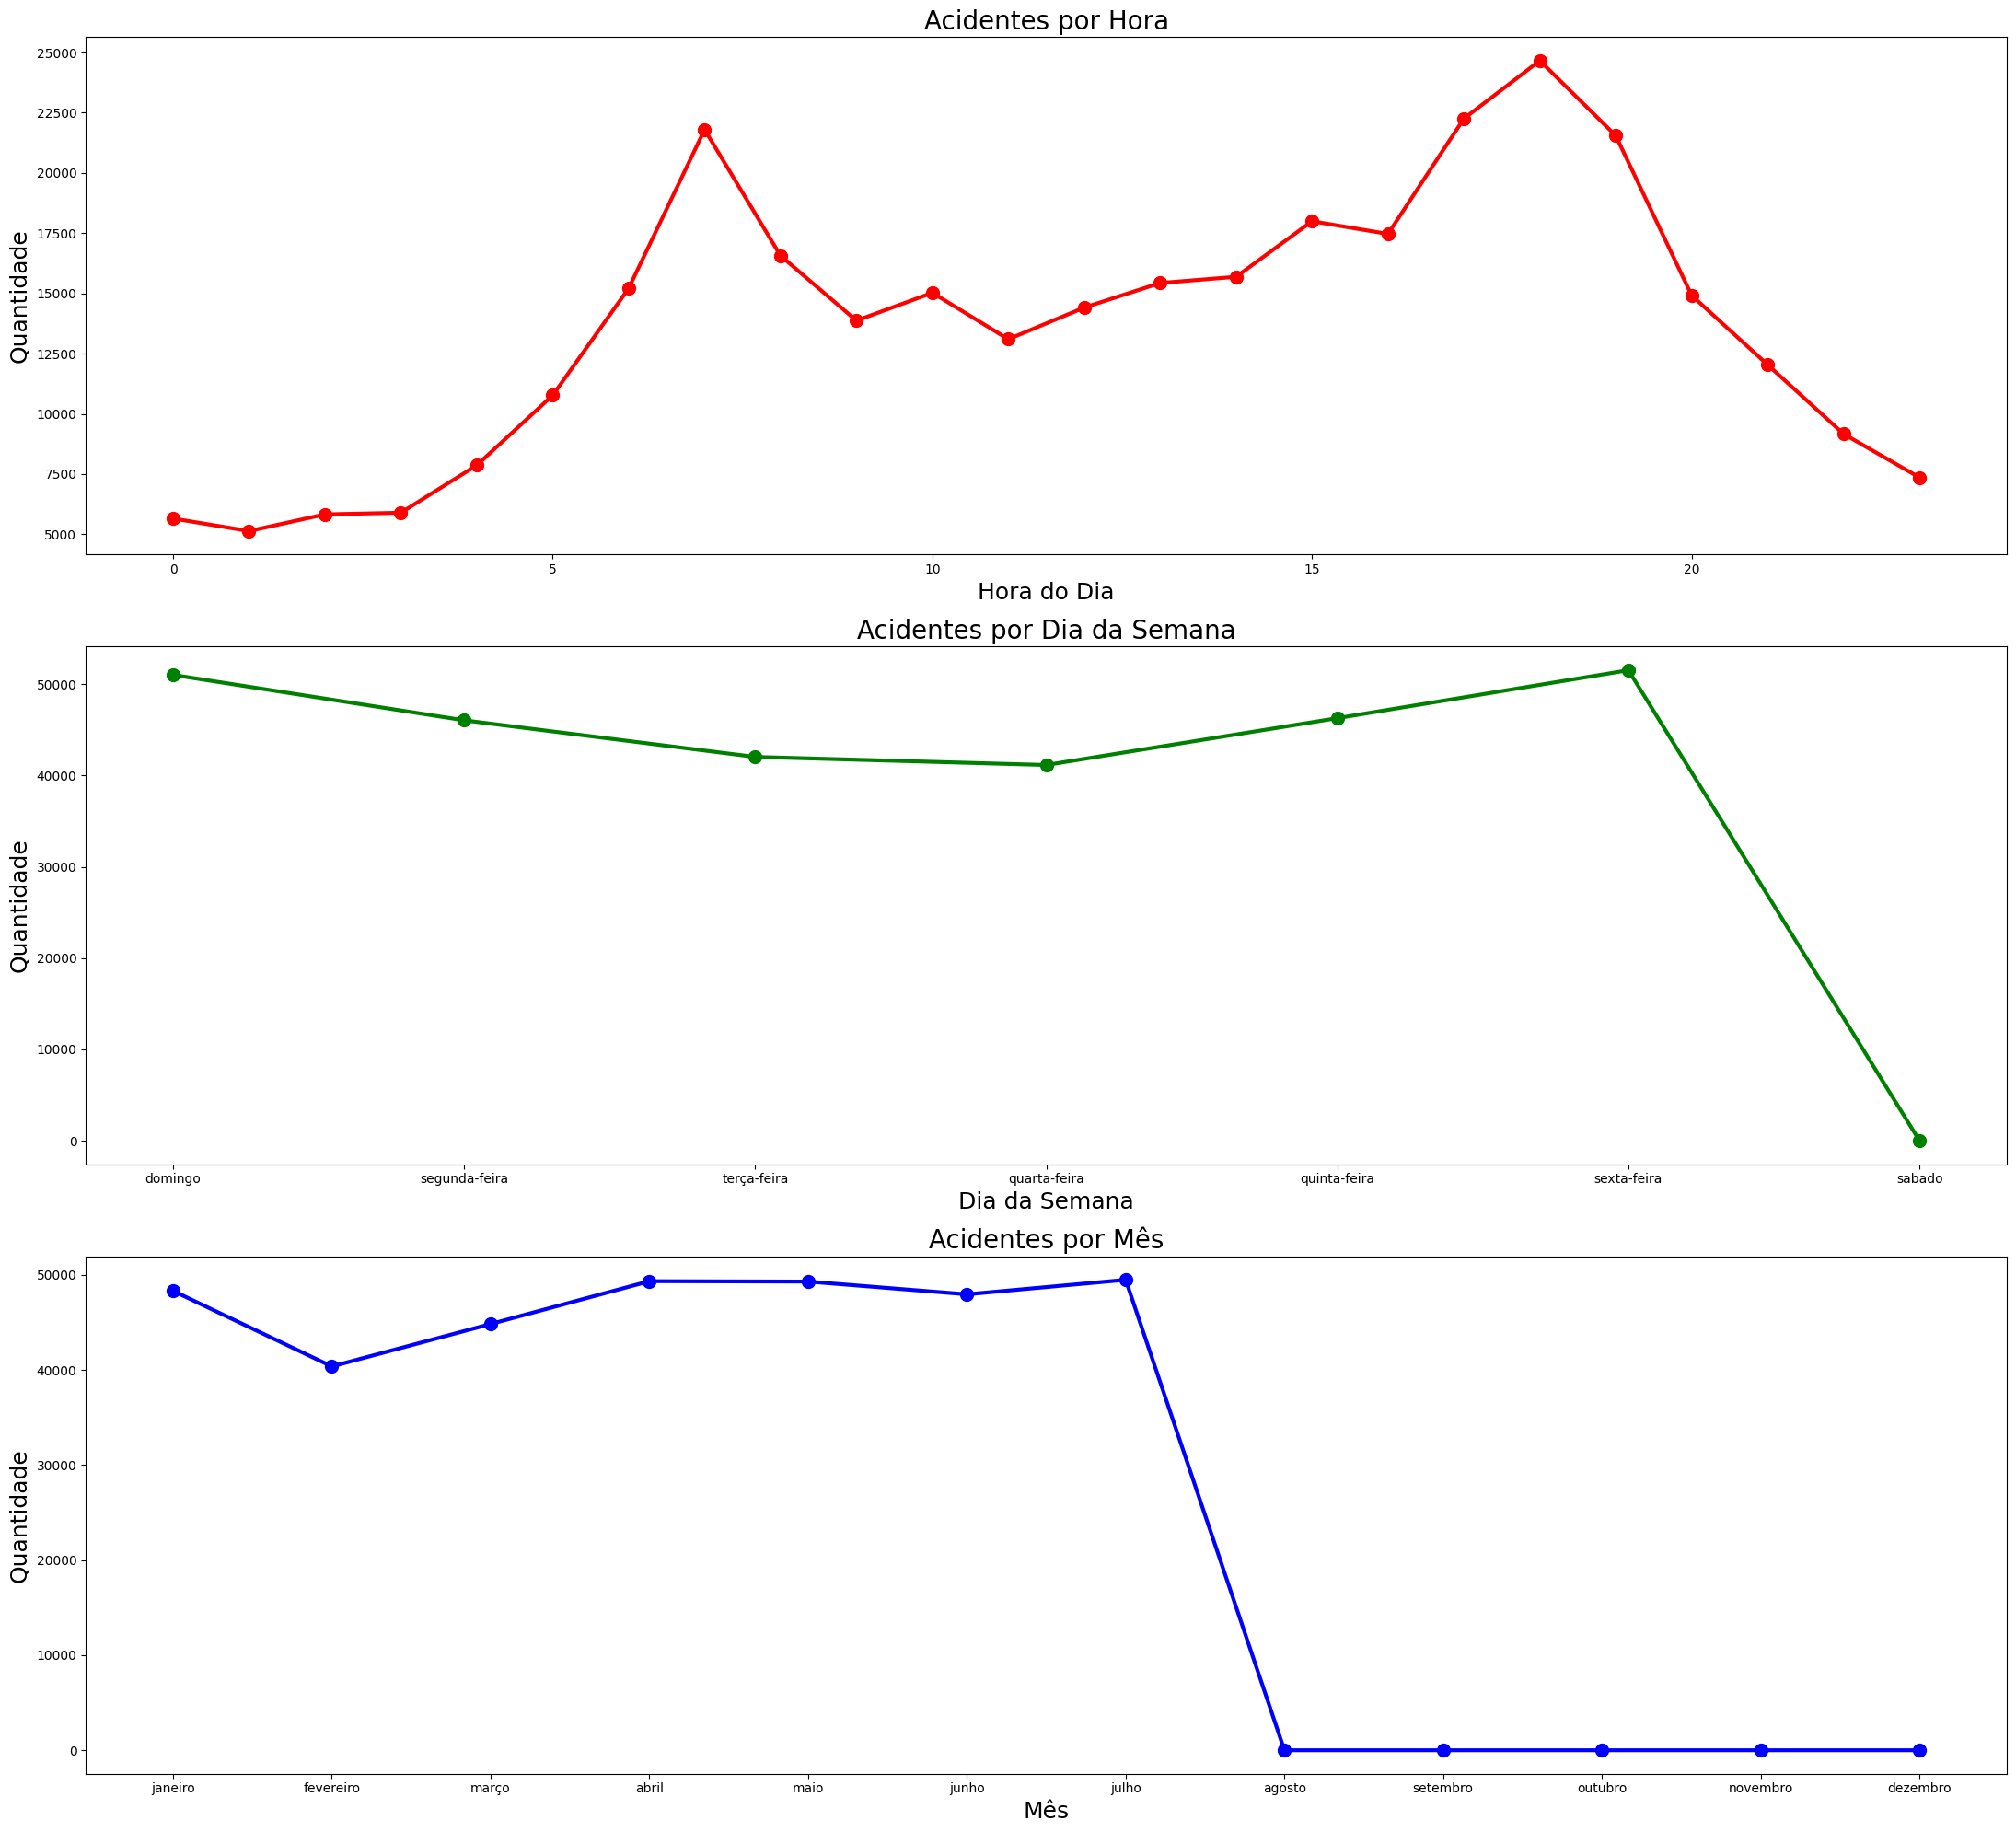

In [96]:

fig, axes = plt.subplots(3, 1, figsize=(22, 20), sharex=False, sharey=False)

### Gráfico de hora ###
axes[0].plot(hour.index, hour.values, marker='o', linewidth=3, color='red', markersize=10)
axes[0].set_title("Acidentes por Hora", fontsize=20)
axes[0].set_xlabel("Hora do Dia", fontsize=18)
axes[0].set_ylabel("Quantidade", fontsize=18)

### Gráfico de dia ###
axes[1].plot(day.index, day.values, marker='o', linewidth=3, color='green', markersize=10)
axes[1].set_title("Acidentes por Dia da Semana", fontsize=20)
axes[1].set_xlabel("Dia da Semana", fontsize=18)
axes[1].set_ylabel("Quantidade", fontsize=18)

### Gráfico de mês ###
axes[2].plot(month.index, month.values, marker='o', linewidth=3, color='blue', markersize=10)
axes[2].set_title("Acidentes por Mês", fontsize=20)
axes[2].set_xlabel("Mês", fontsize=18)
axes[2].set_ylabel("Quantidade", fontsize=18)

plt.tight_layout()

plt.savefig('./../fig/grafico_linhas.png', dpi=300)
plt.show()


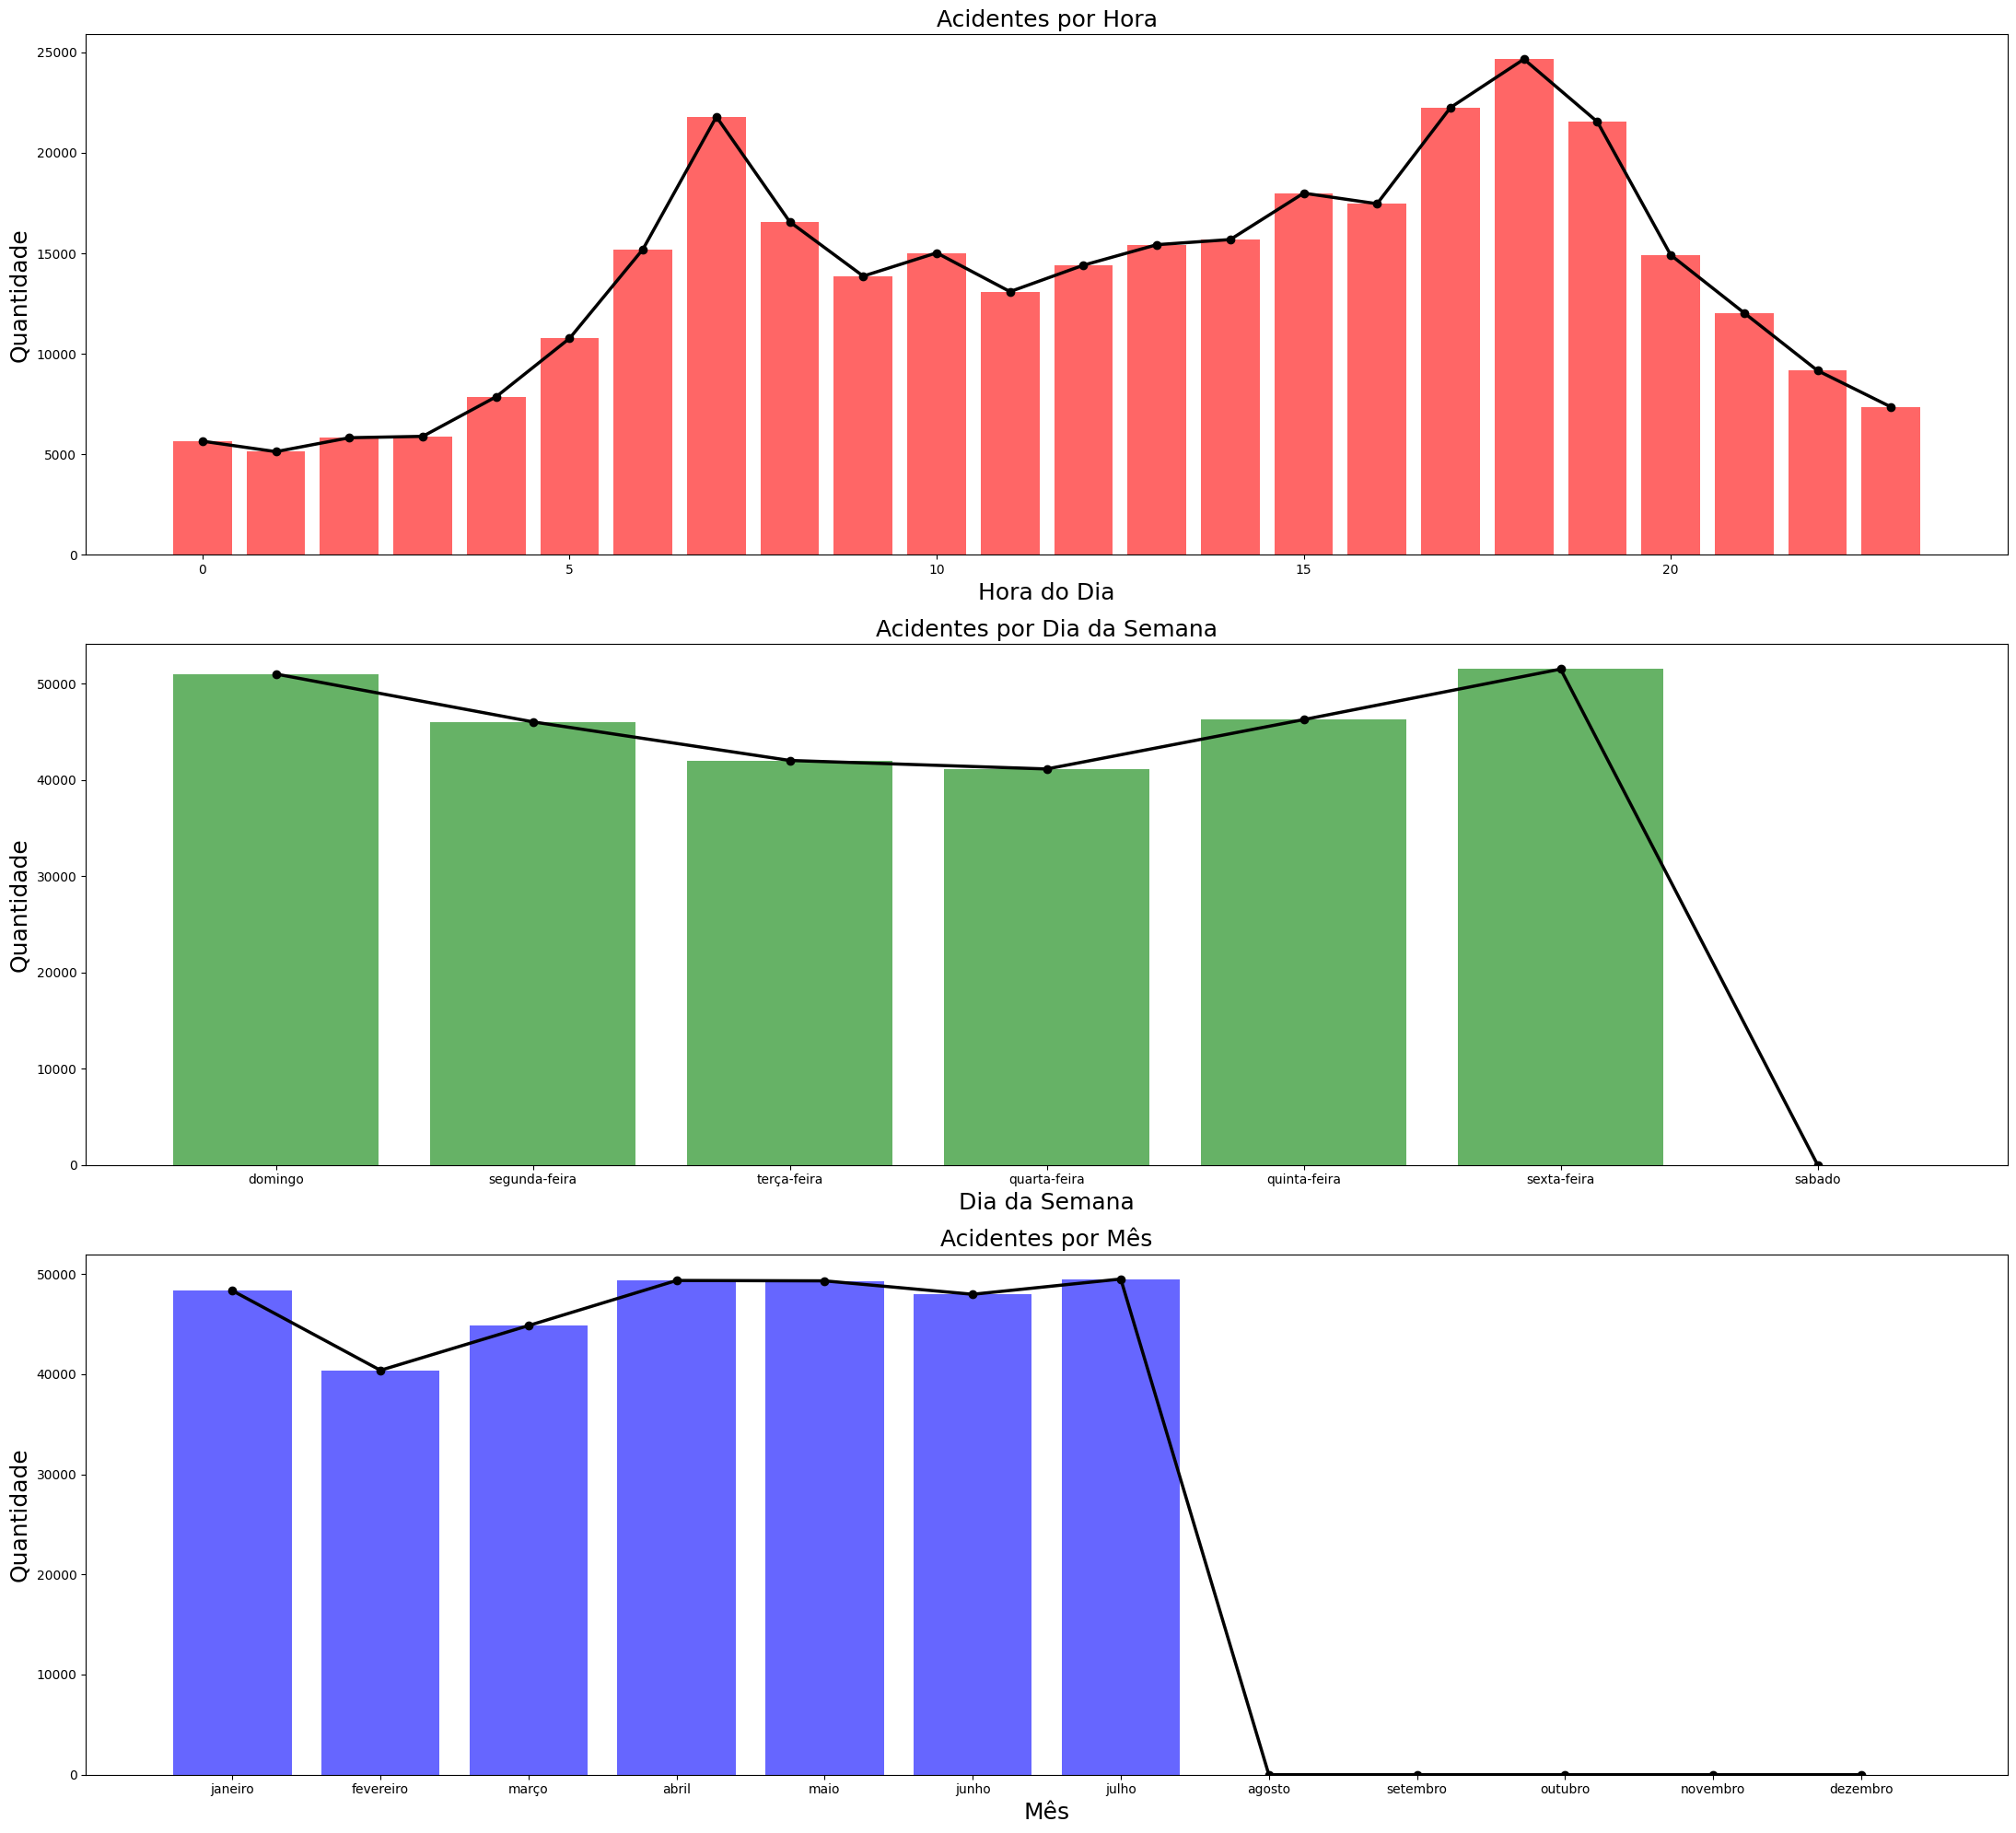

In [97]:

fig, axes = plt.subplots(3, 1, figsize=(22, 20), sharex=False, sharey=False)

### Gráfico de hora ###
axes[0].plot(hour.index, hour.values, marker='o', linewidth=2.5, color='black')
axes[0].bar(hour.index, hour.values, color='red', alpha=0.6)
axes[0].set_title("Acidentes por Hora", fontsize=18)
axes[0].set_xlabel("Hora do Dia", fontsize=18)
axes[0].set_ylabel("Quantidade", fontsize=18)

### Gráfico de dia ###
axes[1].plot(day.index, day.values, marker='o', linewidth=2.5, color='black')
axes[1].bar(day.index, day.values, color='green', alpha=0.6)
axes[1].set_title("Acidentes por Dia da Semana", fontsize=18)
axes[1].set_xlabel("Dia da Semana", fontsize=18)
axes[1].set_ylabel("Quantidade", fontsize=18)

### Gráfico de mês ###
axes[2].plot(month.index, month.values, marker='o', linewidth=2.5, color='black')
axes[2].bar(month.index, month.values, color='blue', alpha=0.6)
axes[2].set_title("Acidentes por Mês", fontsize=18)
axes[2].set_xlabel("Mês", fontsize=18)
axes[2].set_ylabel("Quantidade", fontsize=18)

plt.tight_layout()

plt.savefig('./../fig/grafico_linhas_barras.png', dpi=300)
plt.show()



### Análise de Acidentes

---

#### Acidentes por Hora
O número de acidentes cresce ao longo do dia, **atingindo seu pico no final da tarde, por volta das 17h e 18h**, coincidindo com o horário de pico de tráfego.

---

#### Acidentes por Dia da Semana
A maior concentração de acidentes ocorre no **sábado**, com um número elevado de ocorrências também no domingo.

---

#### Acidentes por Mês
Há um pico notável de acidentes entre **abril e maio**. Após esse período, o número de ocorrências cai drasticamente.